In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"

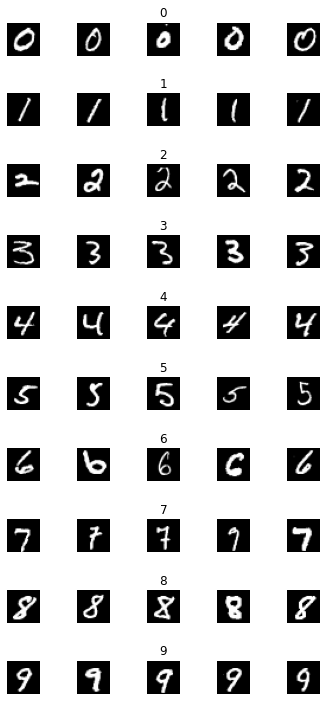

In [ ]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

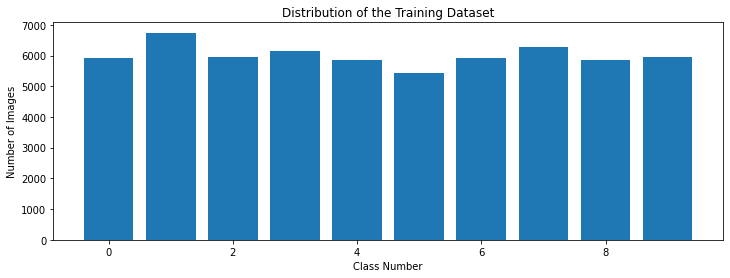

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_23 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=30, verbose=1, shuffle=1)

Epoch 1/30
1688/1688 [==============================] - 3s 1ms/step - loss: 0.4963 - accuracy: 0.8508 - val_loss: 0.3268 - val_accuracy: 0.9082
Epoch 2/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8909 - val_loss: 0.3038 - val_accuracy: 0.9082
Epoch 3/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3516 - accuracy: 0.8997 - val_loss: 0.2813 - val_accuracy: 0.9192
Epoch 4/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3328 - accuracy: 0.9056 - val_loss: 0.2895 - val_accuracy: 0.9193
Epoch 5/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3231 - accuracy: 0.9084 - val_loss: 0.2683 - val_accuracy: 0.9222
Epoch 6/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.9123 - val_loss: 0.2837 - val_accuracy: 0.9200
Epoch 7/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3077 - accuracy: 0.9135 - val_loss: 0.2714 - val_accuracy:

Text(0.5, 0, 'epoch')

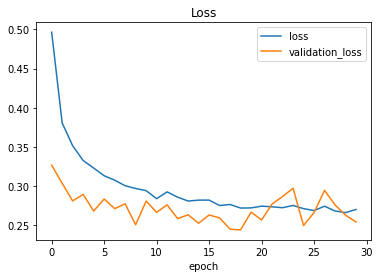

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

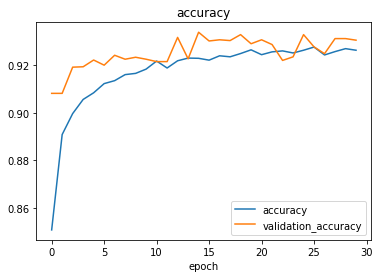

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(x=X_test, y=y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.29959118366241455
Test accuracy: 0.921999990940094


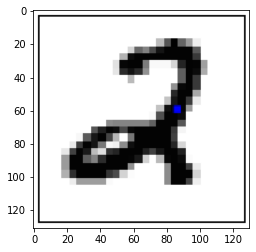

In [ ]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 170
  254 155 100  17   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0  18  89 176 155 198 239 252
  252 252 252 174   0   0   0   0   0 209]
 [  0   0   0   0   0   0   0   0   0   0  27 234 251 252 142  28  28  28
   62 222 252 246  87   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0  28 228 243 229 119   2   2   2
   18 185 252 247  88   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0  69   0   0   

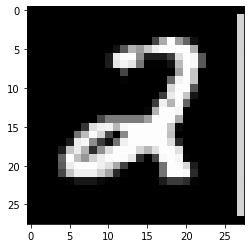

In [ ]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(image)

In [ ]:
image = image/255
image = image.reshape(1, 784)

In [ ]:
prediction = model.predict_classes(image)
print("Predicted image is", str(prediction))

Predicted image is [2]
